In [ ]:
import os.path
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from nltk.corpus import stopwords
from nltk.stem   import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
df = df.replace({'label': {'FAKE': 0, 'REAL': 1}})

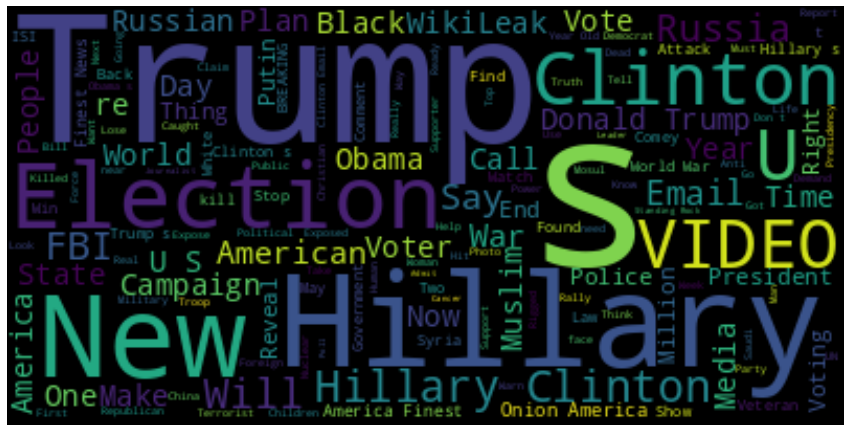

In [ ]:
wc = WordCloud().generate(df.groupby('label')['title'].sum()[0])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

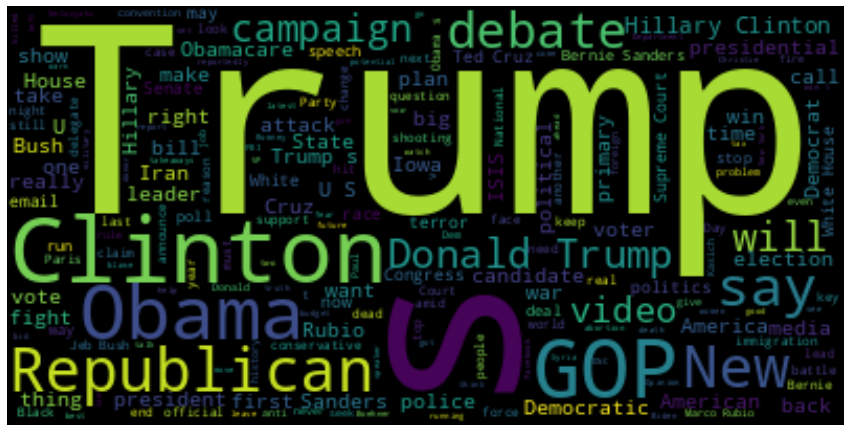

In [ ]:
wc = WordCloud().generate(df.groupby('label')['title'].sum()[1])
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = ''.join([c for c in text if c not in string.punctuation and c not in string.digits])
    tokens = word_tokenize(text, 'english')
    lemmatiser = WordNetLemmatizer()
    lemmatized = [lemmatiser.lemmatize(word) for word in tokens]
    sw = stopwords.words('english')
    stopped = [word for word in lemmatized if word.lower() not in sw]
    return stopped
preprocess_text(df['title'][0])

['Smell', 'Hillary', '’', 'Fear']

In [ ]:
from sklearn.model_selection import train_test_split

X = df['title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape[0], X_test.shape[0]

(5068, 1267)

In [ ]:
y_train.value_counts(normalize=True)

0    0.503157
1    0.496843
Name: label, dtype: float64

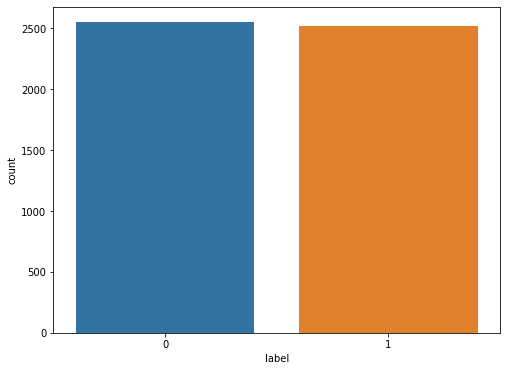

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train)
plt.show()

In [ ]:
fig=px.histogram(df, x="label", color="label")
fig.show()

In [ ]:
X_train = X_train.fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=preprocess_text).fit(X_train)
text_bow_train = bow_transformer.transform(X_train)

In [ ]:
from sklearn.metrics import classification_report

X_test = X_test.fillna('')
text_bow_test = bow_transformer.transform(X_test)

#y_pred = model1.predict(text_bow_test)
#print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(text_bow_train, y_train)


test_pred1 = model1.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, model1.predict(text_bow_train)))
print(accuracy_score(y_test, model1.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_pred1) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_pred1) * 100} %\n\n")


0.983820047355959
0.8571428571428571
Test Set Accuracy : 85.71428571428571 %


Test Set Precision : 87.46031746031746 %


Test Set Recall : 84.37978560490046 %


Test Set F1 : 85.89243959469994 %




In [ ]:
from sklearn.tree import DecisionTreeClassifier

modela2 = DecisionTreeClassifier()
modela2.fit(text_bow_train, y_train)


test_preda2 = modela2.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, modela2.predict(text_bow_train)))
print(accuracy_score(y_test, modela2.predict(text_bow_test)))


# Model evaluation
print(f"Decision Tree Set Accuracy : {accuracy_score(y_test, test_preda2) * 100} %\n\n")
#print(f"Test Set precision : {precision_score(y_test, test_pred2) * 100} %\n\n")
print(f"Decision Tree Test Set Precision : {precision_score(y_test, test_preda2) * 100} %\n\n")
print(f"Decision Tree Test Set Recall : {recall_score(y_test, test_preda2) * 100} %\n\n")
print(f"Decision Tree Test Set F1 : {f1_score(y_test, test_preda2) * 100} %\n\n")
#print(f"Classification Report : \n\n{classification_report(y_test, test_pred2)}")


0.999802683504341
0.77663772691397
Decision Tree Set Accuracy : 77.663772691397 %


Decision Tree Test Set Precision : 78.46153846153847 %


Decision Tree Test Set Recall : 78.1010719754977 %


Decision Tree Test Set F1 : 78.2808902532617 %




In [ ]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(text_bow_train, y_train)

test_pred4 = model4.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, model4.predict(text_bow_train)))
print(accuracy_score(y_test, model4.predict(text_bow_test)))

# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_pred4) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_pred4) * 100} %\n\n")

0.9429755327545383
0.8524072612470402
Test Set Accuracy : 85.24072612470403 %


Test Set Precision : 85.09036144578313 %


Test Set Recall : 86.52373660030628 %


Test Set F1 : 85.80106302201975 %




In [ ]:
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
modela7 = XGBClassifier()

modela7.fit(text_bow_train, y_train)


test_preda7 = modela7.predict(text_bow_test)


# testing the model
print(accuracy_score(y_train, modela7.predict(text_bow_train)))
print(accuracy_score(y_test, modela7.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_preda7) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_preda7) * 100} %\n\n")

0.8626677190213102
0.8097868981846882
Test Set Accuracy : 80.97868981846882 %


Test Set Precision : 86.52482269503547 %


Test Set Recall : 74.73200612557427 %


Test Set F1 : 80.19720624486443 %




In [ ]:
modela6 = SGDClassifier()

modela6.fit(text_bow_train, y_train)


test_preda6 = modela6.predict(text_bow_test)

# testing the model
print(accuracy_score(y_train, modela6.predict(text_bow_train)))
print(accuracy_score(y_test, modela6.predict(text_bow_test)))


# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set Precision : {precision_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set Recall : {recall_score(y_test, test_preda6) * 100} %\n\n")
print(f"Test Set F1 : {f1_score(y_test, test_preda6) * 100} %\n\n")

0.9990134175217048
0.8318863456985004
Test Set Accuracy : 83.18863456985004 %


Test Set Precision : 83.84615384615385 %


Test Set Recall : 83.46094946401224 %


Test Set F1 : 83.65310821181889 %




In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier

# importing voting classifier
from sklearn.ensemble import VotingClassifier



# initializing all the model objects with default parameters
model_v1 = LogisticRegression()
model_v2 = DecisionTreeClassifier()
model_v3 = MultinomialNB()
model_v4 = SGDClassifier()
model_v5 = XGBClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_v1), ('dt', model_v2), ('nb', model_v3),
  ('sgd',  model_v4), ('xgbc', model_v5)],
   voting='hard')

# training all the model on the train dataset
final_model.fit(text_bow_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(text_bow_test)

# printing log loss between actual and predicted value
print(log_loss(y_test, pred_final))

5.035301223262617


In [ ]:
print(f"Voting classifier Set Accuracy : {accuracy_score(y_test, pred_final) * 100} %\n\n")
#print(f"Test Set precision : {precision_score(y_test, test_pred2) * 100} %\n\n")
print(f"Voting classifier Precision : {precision_score(y_test, pred_final) * 100} %\n\n")
print(f"Voting classifier Recall : {recall_score(y_test, pred_final) * 100} %\n\n")
print(f"Voting classifier F1 : {f1_score(y_test, pred_final) * 100} %\n\n")
#print(f"Classification Report : \n\n{classification_report(y_test, test_pred2)}")

Voting classifier Set Accuracy : 86.02999210734016 %


Voting classifier Precision : 88.2636655948553 %


Voting classifier Recall : 84.07350689127105 %


Voting classifier F1 : 86.11764705882351 %


